In [47]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [48]:
data=pd.read_csv("weatherAUS.csv")
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [49]:
data.shape

(145460, 23)

In [50]:
data.head()
data=data.drop('Date',axis=1)
data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [51]:
loc_ation=data['Location']
loc_ation

0         Albury
1         Albury
2         Albury
3         Albury
4         Albury
           ...  
145455     Uluru
145456     Uluru
145457     Uluru
145458     Uluru
145459     Uluru
Name: Location, Length: 145460, dtype: object

In [52]:
data=data.drop('Location',axis=1)

In [53]:
data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [54]:
mapping={'E':0,'W':1,'N':2,'S':3,'NE':4,'SE':5,'SW':6,'NW':7,'NNE':8,'ENE':9,'ESE':10,'SSE':11,'SSW':12,'WSW':13,'WNW':14,'NNW':15}
data=data.replace({'WindGustDir':mapping})
data=data.replace({'WindDir9am':mapping})
data=data.replace({'WindDir3pm':mapping})
mapping1={'No':0,'Yes':1}
data=data.replace({'RainToday':mapping1})
data=data.replace({'RainTomorrow':mapping1})
data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,1.0,44.0,1.0,14.0,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,7.4,25.1,0.0,NaN,NaN,14.0,44.0,15.0,13.0,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,12.9,25.7,0.0,NaN,NaN,13.0,46.0,1.0,13.0,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,9.2,28.0,0.0,NaN,NaN,4.0,24.0,5.0,0.0,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,17.5,32.3,1.0,NaN,NaN,1.0,41.0,9.0,7.0,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,NaN,NaN,0.0,31.0,5.0,9.0,13.0,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0.0,0.0
145456,3.6,25.3,0.0,NaN,NaN,15.0,22.0,5.0,2.0,13.0,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0.0,0.0
145457,5.4,26.9,0.0,NaN,NaN,2.0,37.0,5.0,14.0,9.0,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0.0,0.0
145458,7.8,27.0,0.0,NaN,NaN,5.0,28.0,11.0,2.0,13.0,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0.0,0.0


In [55]:
data.fillna(0)
data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,1.0,44.0,1.0,14.0,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,7.4,25.1,0.0,NaN,NaN,14.0,44.0,15.0,13.0,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,12.9,25.7,0.0,NaN,NaN,13.0,46.0,1.0,13.0,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,9.2,28.0,0.0,NaN,NaN,4.0,24.0,5.0,0.0,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,17.5,32.3,1.0,NaN,NaN,1.0,41.0,9.0,7.0,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,NaN,NaN,0.0,31.0,5.0,9.0,13.0,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0.0,0.0
145456,3.6,25.3,0.0,NaN,NaN,15.0,22.0,5.0,2.0,13.0,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0.0,0.0
145457,5.4,26.9,0.0,NaN,NaN,2.0,37.0,5.0,14.0,9.0,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0.0,0.0
145458,7.8,27.0,0.0,NaN,NaN,5.0,28.0,11.0,2.0,13.0,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0.0,0.0


In [56]:
data=data.interpolate(method ='linear', limit_direction ='forward') 
data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,1.0,44.0,1.0,14.0,20.0,...,71.0,22.0,1007.7,1007.1,8.00,NaN,16.9,21.8,0.0,0.0
1,7.4,25.1,0.0,NaN,NaN,14.0,44.0,15.0,13.0,4.0,...,44.0,25.0,1010.6,1007.8,7.75,NaN,17.2,24.3,0.0,0.0
2,12.9,25.7,0.0,NaN,NaN,13.0,46.0,1.0,13.0,19.0,...,38.0,30.0,1007.6,1008.7,7.50,2.000000,21.0,23.2,0.0,0.0
3,9.2,28.0,0.0,NaN,NaN,4.0,24.0,5.0,0.0,11.0,...,45.0,16.0,1017.6,1012.8,7.25,5.000000,18.1,26.5,0.0,0.0
4,17.5,32.3,1.0,NaN,NaN,1.0,41.0,9.0,7.0,7.0,...,82.0,33.0,1010.8,1006.0,7.00,8.000000,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,10.0,10.7,0.0,31.0,5.0,9.0,13.0,...,51.0,24.0,1024.6,1020.3,3.60,4.500000,10.1,22.4,0.0,0.0
145456,3.6,25.3,0.0,10.0,10.7,15.0,22.0,5.0,2.0,13.0,...,56.0,21.0,1023.5,1019.1,3.40,3.666667,10.9,24.5,0.0,0.0
145457,5.4,26.9,0.0,10.0,10.7,2.0,37.0,5.0,14.0,9.0,...,53.0,24.0,1021.0,1016.8,3.20,2.833333,12.5,26.1,0.0,0.0
145458,7.8,27.0,0.0,10.0,10.7,5.0,28.0,11.0,2.0,13.0,...,51.0,24.0,1019.4,1016.5,3.00,2.000000,15.1,26.0,0.0,0.0


In [57]:
data=data.replace(to_replace = np.nan, value = 0)
data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,0.0,0.0,1.0,44.0,1.0,14.0,20.0,...,71.0,22.0,1007.7,1007.1,8.00,0.000000,16.9,21.8,0.0,0.0
1,7.4,25.1,0.0,0.0,0.0,14.0,44.0,15.0,13.0,4.0,...,44.0,25.0,1010.6,1007.8,7.75,0.000000,17.2,24.3,0.0,0.0
2,12.9,25.7,0.0,0.0,0.0,13.0,46.0,1.0,13.0,19.0,...,38.0,30.0,1007.6,1008.7,7.50,2.000000,21.0,23.2,0.0,0.0
3,9.2,28.0,0.0,0.0,0.0,4.0,24.0,5.0,0.0,11.0,...,45.0,16.0,1017.6,1012.8,7.25,5.000000,18.1,26.5,0.0,0.0
4,17.5,32.3,1.0,0.0,0.0,1.0,41.0,9.0,7.0,7.0,...,82.0,33.0,1010.8,1006.0,7.00,8.000000,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,10.0,10.7,0.0,31.0,5.0,9.0,13.0,...,51.0,24.0,1024.6,1020.3,3.60,4.500000,10.1,22.4,0.0,0.0
145456,3.6,25.3,0.0,10.0,10.7,15.0,22.0,5.0,2.0,13.0,...,56.0,21.0,1023.5,1019.1,3.40,3.666667,10.9,24.5,0.0,0.0
145457,5.4,26.9,0.0,10.0,10.7,2.0,37.0,5.0,14.0,9.0,...,53.0,24.0,1021.0,1016.8,3.20,2.833333,12.5,26.1,0.0,0.0
145458,7.8,27.0,0.0,10.0,10.7,5.0,28.0,11.0,2.0,13.0,...,51.0,24.0,1019.4,1016.5,3.00,2.000000,15.1,26.0,0.0,0.0


In [58]:
scaled_data=preprocessing.scale(data)

In [59]:
pca=PCA()

In [60]:
pca.fit(scaled_data)

PCA()

In [61]:
pca_data=pca.transform(scaled_data)

In [62]:
per_var=np.round(pca.explained_variance_ratio_*100, decimals=1)
per_var

array([24.2, 15.9,  9.6,  6.3,  5.9,  4.9,  4.6,  4.3,  4.1,  4. ,  3.3,
        2.5,  2.3,  2.2,  2.1,  1.6,  1.3,  0.5,  0.2,  0.1,  0.1])

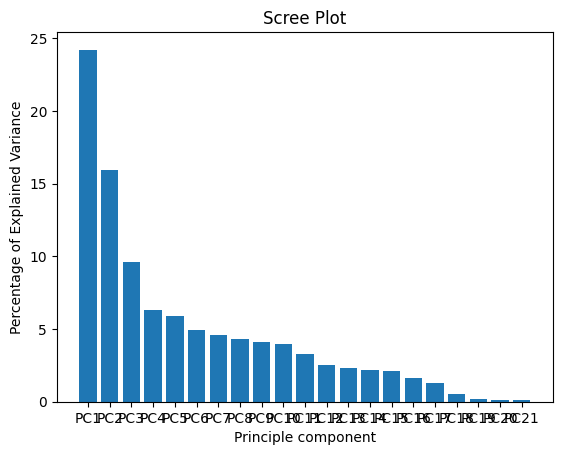

In [63]:
labels=['PC'+str(x) for x in range(1,len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principle component")
plt.title("Scree Plot")
plt.show()




In [64]:
pca_df=pd.DataFrame(pca_data,index=[*loc_ation],columns=labels)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
Albury,0.676841,0.655707,0.271382,-1.540117,-0.556103,-1.091502,1.984680,-1.359893,1.158714,-0.352142,...,0.804052,-0.620108,1.488154,2.155291,-0.010689,0.436589,-0.671515,-0.350996,-0.037171,0.094339
Albury,0.612058,-0.140544,-0.082195,-2.949280,1.779395,0.898221,-0.084507,-1.796639,-0.294793,0.489546,...,1.585704,-0.615596,0.933201,1.720088,-1.103899,-0.249015,0.350838,-0.114285,-0.040157,-0.070281
Albury,1.384443,0.769812,0.494017,-2.492866,-0.069433,0.255786,2.194419,-0.798916,-0.871367,0.046488,...,0.287342,-0.371485,1.132100,1.591034,-1.199227,0.130736,-0.010843,-0.362788,0.183019,0.030652
Albury,0.427881,-1.262235,-1.712929,-1.300839,-1.802599,-0.676147,0.439891,-1.793241,-0.641243,1.636519,...,0.154048,-0.526701,0.658303,0.857144,-0.335817,0.495101,0.131240,-0.065734,-0.131984,0.098307
Albury,0.814032,1.060203,-2.071273,-1.794844,-1.318832,-0.301173,0.084121,-2.016787,0.654256,0.266795,...,0.658416,0.396894,-0.538801,0.288696,0.870874,0.222594,-0.294750,0.435808,0.105707,0.188446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uluru,-0.145633,-2.695850,0.578073,0.087505,-0.559588,-0.663730,0.531104,0.308721,1.688940,0.999893,...,0.194208,-0.252884,-0.003659,-0.469661,0.244018,0.258886,0.351212,0.237248,0.103150,0.014595
Uluru,0.112756,-2.841529,0.106639,-0.250752,0.576685,-0.170991,0.051147,0.972953,-1.565906,1.594992,...,-0.072193,-0.348108,0.292330,-0.315074,0.502330,0.760321,0.367334,0.225592,0.120961,0.021031
Uluru,0.795817,-2.377425,0.202986,-0.293252,0.529308,-0.507068,1.048684,0.341336,1.896593,0.459789,...,0.473416,-0.285576,0.040857,-0.140917,0.399017,-0.262964,0.416338,0.269720,0.155470,-0.047036
Uluru,1.142231,-2.425133,-0.160682,0.298998,0.329918,-0.669619,-1.144406,-0.240208,0.239450,1.276987,...,-0.091889,-0.403124,0.490454,0.089086,0.330585,0.180254,0.245265,0.068874,0.161600,-0.024719


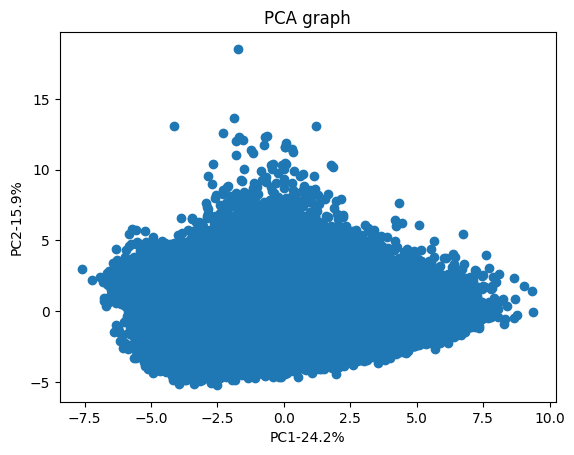

NameError: name 'sample' is not defined

In [65]:
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.title("PCA graph")
plt.xlabel("PC1-{0}%".format(per_var[0]))
plt.ylabel("PC2-{0}%".format(per_var[1]))
plt.show()
for samples in pca_df.index:
    plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))
plt.show()

In [66]:
sd=pd.DataFrame(scaled_data)
sd

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.186774,-0.043674,-0.215257,-1.094310,-2.013032,-1.361060,0.297627,-1.358100,1.453057,0.669134,...,0.109998,-1.429642,-1.374327,-1.130233,1.258853,-1.812867,-0.009854,0.014222,-0.548312,-0.54828
1,-0.752237,0.265732,-0.285502,-1.094310,-2.013032,1.489613,0.297627,1.734742,1.235120,-1.128275,...,-1.306836,-1.284536,-0.960990,-1.029669,1.164988,-1.812867,0.036313,0.374935,-0.548312,-0.54828
2,0.108523,0.350116,-0.285502,-1.094310,-2.013032,1.270330,0.447320,-1.358100,1.235120,0.556796,...,-1.621689,-1.042694,-1.388580,-0.900372,1.071122,-1.027820,0.621103,0.216221,-0.548312,-0.54828
3,-0.470534,0.673586,-0.285502,-1.094310,-2.013032,-0.703212,-1.199301,-0.474431,-1.598065,-0.341908,...,-1.254361,-1.719853,0.036721,-0.311354,0.977257,0.149750,0.174816,0.692362,-0.548312,-0.54828
4,0.828431,1.278334,-0.168428,-1.094310,-2.013032,-1.361060,0.073088,0.409238,-0.072504,-0.791261,...,0.687227,-0.897588,-0.932484,-1.288262,0.883391,1.327321,0.128649,1.154075,-0.548312,-0.54828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,-1.472146,0.026646,-0.285502,0.652981,0.924913,-1.580342,-0.675376,-0.474431,0.363371,-0.117232,...,-0.939509,-1.332905,1.034432,0.766119,-0.393178,-0.046511,-1.056321,0.100793,-0.548312,-0.54828
145456,-1.346944,0.293860,-0.285502,0.652981,0.924913,1.708895,-1.348994,-0.474431,-1.162190,-0.117232,...,-0.677132,-1.478011,0.877649,0.593724,-0.468270,-0.373614,-0.933207,0.403792,-0.548312,-0.54828
145457,-1.065241,0.518883,-0.285502,0.652981,0.924913,-1.141777,-0.226298,-0.474431,1.453057,-0.566585,...,-0.834558,-1.332905,0.521324,0.263299,-0.543362,-0.700717,-0.686980,0.634648,-0.548312,-0.54828
145458,-0.689636,0.532947,-0.285502,0.652981,0.924913,-0.483930,-0.899915,0.851073,-1.162190,-0.117232,...,-0.939509,-1.332905,0.293275,0.220200,-0.618454,-1.027820,-0.286860,0.620220,-0.548312,-0.54828


In [21]:
from sklearn.cluster import KMeans

In [22]:
def optimize_k(datas,max_k):
    means=[]
    inertias=[]
    for k in range(1,max_k):
        kmeans=KMeans(n_clusters=k)
        kmeans.fit(datas)
        means.append(k)
        inertias.append(kmeans.inertia_)
    fig=plt.subplots(figsize=(10,5))
    plt.plot(means,inertias,'o-')
    plt.xlabel("Number of clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()

/home/aditya/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/aditya/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/aditya/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/aditya/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1

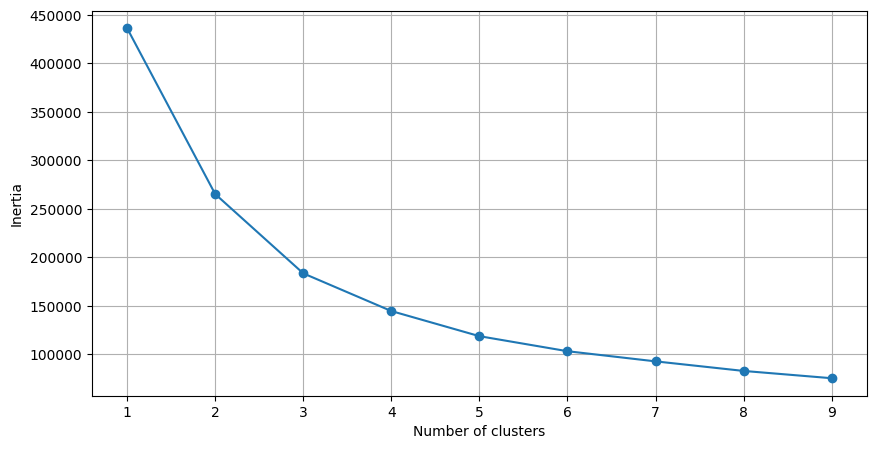

In [68]:
optimize_k(sd[[0,1,2]],10)

In [70]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(sd[[0,1,2]])


/home/aditya/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [72]:
sd['kmeans_3']=kmeans.labels_
sd

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,kmeans_3
0,0.186774,-0.043674,-0.215257,-1.094310,-2.013032,-1.361060,0.297627,-1.358100,1.453057,0.669134,...,-1.429642,-1.374327,-1.130233,1.258853,-1.812867,-0.009854,0.014222,-0.548312,-0.54828,1
1,-0.752237,0.265732,-0.285502,-1.094310,-2.013032,1.489613,0.297627,1.734742,1.235120,-1.128275,...,-1.284536,-0.960990,-1.029669,1.164988,-1.812867,0.036313,0.374935,-0.548312,-0.54828,0
2,0.108523,0.350116,-0.285502,-1.094310,-2.013032,1.270330,0.447320,-1.358100,1.235120,0.556796,...,-1.042694,-1.388580,-0.900372,1.071122,-1.027820,0.621103,0.216221,-0.548312,-0.54828,1
3,-0.470534,0.673586,-0.285502,-1.094310,-2.013032,-0.703212,-1.199301,-0.474431,-1.598065,-0.341908,...,-1.719853,0.036721,-0.311354,0.977257,0.149750,0.174816,0.692362,-0.548312,-0.54828,1
4,0.828431,1.278334,-0.168428,-1.094310,-2.013032,-1.361060,0.073088,0.409238,-0.072504,-0.791261,...,-0.897588,-0.932484,-1.288262,0.883391,1.327321,0.128649,1.154075,-0.548312,-0.54828,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,-1.472146,0.026646,-0.285502,0.652981,0.924913,-1.580342,-0.675376,-0.474431,0.363371,-0.117232,...,-1.332905,1.034432,0.766119,-0.393178,-0.046511,-1.056321,0.100793,-0.548312,-0.54828,0
145456,-1.346944,0.293860,-0.285502,0.652981,0.924913,1.708895,-1.348994,-0.474431,-1.162190,-0.117232,...,-1.478011,0.877649,0.593724,-0.468270,-0.373614,-0.933207,0.403792,-0.548312,-0.54828,0
145457,-1.065241,0.518883,-0.285502,0.652981,0.924913,-1.141777,-0.226298,-0.474431,1.453057,-0.566585,...,-1.332905,0.521324,0.263299,-0.543362,-0.700717,-0.686980,0.634648,-0.548312,-0.54828,0
145458,-0.689636,0.532947,-0.285502,0.652981,0.924913,-0.483930,-0.899915,0.851073,-1.162190,-0.117232,...,-1.332905,0.293275,0.220200,-0.618454,-1.027820,-0.286860,0.620220,-0.548312,-0.54828,0


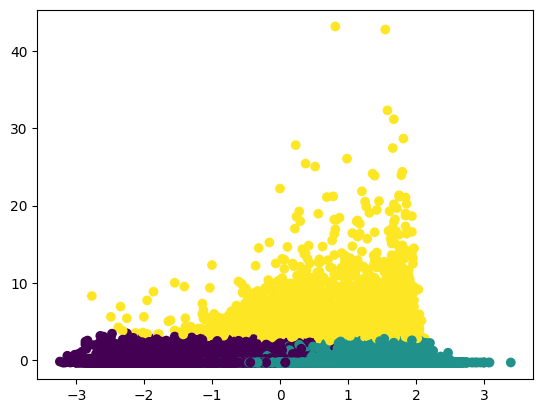

In [76]:
plt.scatter(x=sd[0],y=sd[2],c=data['kmeans_3'])
